In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import tensorflow as tf
from tensorflow import keras
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [ ]:
data_dir = '/content/drive/MyDrive/مجلد بلا عنوان/Dataset_BUSI_with_GT'

In [ ]:
# Working on 128 * 128 images, batch = 32 images each
batch_size = 32
img_height = 128
img_width = 128

In [ ]:
# Training data -> 80%
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [ ]:
# Printing& storing classs names 'labels' to use later.
class_names = train_ds.class_names
print(class_names)

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

In [ ]:
# Configrations for more performance, keeping images in memory, just for my Potato PC :')
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# Building CNN model using Conv2D 
num_classes = len(class_names)

model = Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
 
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation = 'softmax')
])

In [ ]:
# Compiling 
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# Printing model summary
model.summary()

In [23]:
epochs=30

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


20/20 [==============================] - 67s 1s/step - loss: 0.5953 - accuracy: 0.7179 - val_loss: 0.5222 - val_accuracy: 0.7821
Epoch 2/30
20/20 [==============================] - 12s 577ms/step - loss: 0.5369 - accuracy: 0.7452 - val_loss: 0.3914 - val_accuracy: 0.8590
Epoch 3/30
20/20 [==============================] - 12s 581ms/step - loss: 0.4827 - accuracy: 0.8029 - val_loss: 0.3808 - val_accuracy: 0.8397
Epoch 4/30
20/20 [==============================] - 12s 580ms/step - loss: 0.4168 - accuracy: 0.8446 - val_loss: 0.3424 - val_accuracy: 0.8654
Epoch 5/30
20/20 [==============================] - 11s 576ms/step - loss: 0.3646 - accuracy: 0.8542 - val_loss: 0.3995 - val_accuracy: 0.8397
Epoch 6/30
20/20 [==============================] - 12s 578ms/step - loss: 0.3005 - accuracy: 0.8878 - val_loss: 0.3615 - val_accuracy: 0.8269
Epoch 7/30
20/20 [==============================] - 12s 587ms/step - loss: 0.2757 - accuracy: 0.8910 - val_loss: 0.2644 - val_accuracy: 0.8782
Epoch 8/30
20

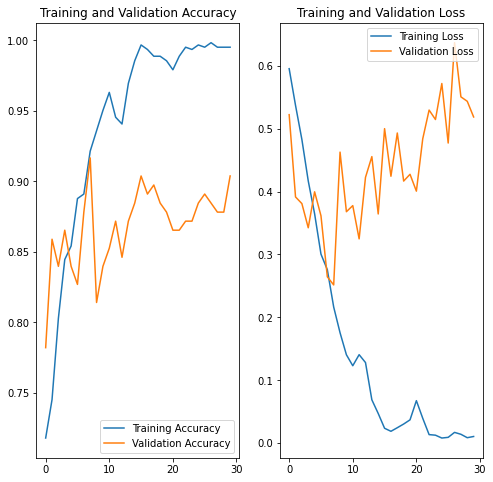

In [24]:
#Playing with subplot Visualizer, Accuracy vs Loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [25]:
# data augmentation, 
data_augmentation = keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
  ]
)

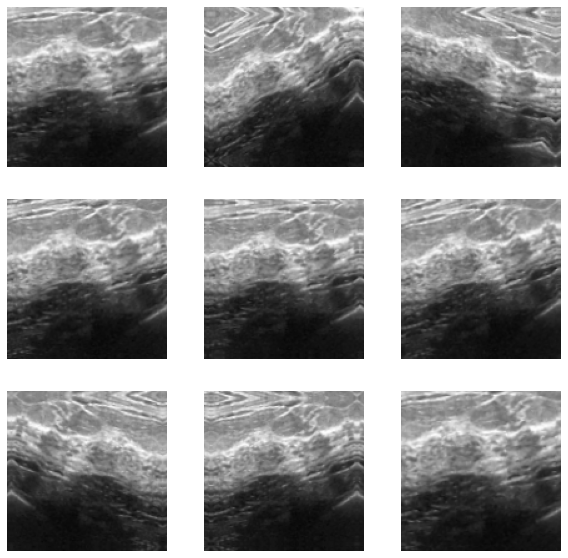

In [26]:
# Showing how data agumentation affects the same image
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
# new model using Dropout
model = Sequential([
  data_augmentation,
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
 tf.keras.layers.Dense(num_classes, activation = 'softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

In [30]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


20/20 [==============================] - 13s 593ms/step - loss: 0.6336 - accuracy: 0.6955 - val_loss: 0.4953 - val_accuracy: 0.7821
Epoch 2/20
20/20 [==============================] - 12s 582ms/step - loss: 0.5545 - accuracy: 0.7179 - val_loss: 0.4375 - val_accuracy: 0.7885
Epoch 3/20
20/20 [==============================] - 12s 587ms/step - loss: 0.5089 - accuracy: 0.7644 - val_loss: 0.4054 - val_accuracy: 0.8269
Epoch 4/20
20/20 [==============================] - 12s 584ms/step - loss: 0.4836 - accuracy: 0.8061 - val_loss: 0.3888 - val_accuracy: 0.8526
Epoch 5/20
20/20 [==============================] - 12s 583ms/step - loss: 0.4585 - accuracy: 0.7917 - val_loss: 0.3537 - val_accuracy: 0.8526
Epoch 6/20
20/20 [==============================] - 12s 593ms/step - loss: 0.4658 - accuracy: 0.8061 - val_loss: 0.3759 - val_accuracy: 0.8397
Epoch 7/20
20/20 [==============================] - 12s 581ms/step - loss: 0.4366 - accuracy: 0.8109 - val_loss: 0.4796 - val_accuracy: 0.8013
Epoch 8/20

In [ ]:
# Plotting again to see new results visualized:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Working on 128 * 128 images, batch = 32 images each
batch_size = 32
img_height = 224
img_width = 224

In [ ]:
# Training data -> 80%
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [ ]:
import numpy as np
from keras import layers
import keras.applications.resnet
from keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
import scipy
from tqdm import tqdm
import tensorflow as tf
from keras import backend as K
import gc
from functools import partial
from sklearn import metrics
from collections import Counter
import json
import itertools
%matplotlib inline

In [35]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 780 files belonging to 2 classes.
Using 156 files for validation.


In [ ]:
def build_model(backbone, lr=1e-4):
    model = Sequential()
    model.add(backbone)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dropout(0.5))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(num_classes, activation='softmax'))
    
    
    model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer='adam',
        metrics=['accuracy']
    )
    
    return model

In [37]:
from keras.applications.densenet import DenseNet201, DenseNet121

K.clear_session()
gc.collect()

resnet = DenseNet201(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)


 


model = build_model(resnet ,lr = 1e-4)
model.summary()

74850304/74836368 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 global_average_pooling2d (G  (None, 1920)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1920)              0         
                                                                 
 batch_normalization (BatchN  (None, 1920)             7680      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 2)                 3842      
                                                         

In [38]:
epochs = 5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


20/20 [==============================] - 802s 38s/step - loss: 0.6399 - accuracy: 0.7532 - val_loss: 1206.0938 - val_accuracy: 0.2179
Epoch 2/5
20/20 [==============================] - 745s 37s/step - loss: 0.3952 - accuracy: 0.8462 - val_loss: 109.3565 - val_accuracy: 0.3077
Epoch 3/5
20/20 [==============================] - 747s 37s/step - loss: 0.2650 - accuracy: 0.8910 - val_loss: 15.6570 - val_accuracy: 0.7821
Epoch 4/5
20/20 [==============================] - 756s 38s/step - loss: 0.2070 - accuracy: 0.9375 - val_loss: 16.2996 - val_accuracy: 0.7885
Epoch 5/5
20/20 [==============================] - 746s 37s/step - loss: 0.1524 - accuracy: 0.9471 - val_loss: 2.1747 - val_accuracy: 0.8141
